#Proyecto final automatas ($2^3$)
Movimiento de un cubo de rubik $2^2$





In [2]:
# Importe de librerias y funciones #

!mkdir files
from IPython.display import Image, display

#!mkdir files
!pip install automata-lib

#from automata.fa.dfa import DFA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 KB 925.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 3.8 MB/s eta 0:00:00
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


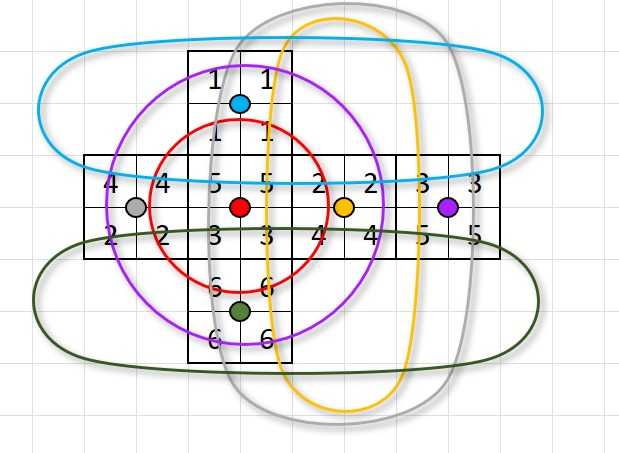

In [ ]:
display(Image('Cubo de rubik 2x2.jpg'))

In [ ]:
Cubo_matriz_inicial=[ # Comprimido, leido de izquierda a derecha y arriba hacia abajo.
    ['1','1','1','1'],
    ['2','2','3','3'],
    ['4','4','5','5'],
    ['2','2','3','3'],
    ['4','4','5','5'],
    ['6','6','6','6']
]
Cinta_inicial=['1','1','1','1','2','2','3','3','4','4','5','5','2','2','3','3','4','4','5','5','6','6','6','6']

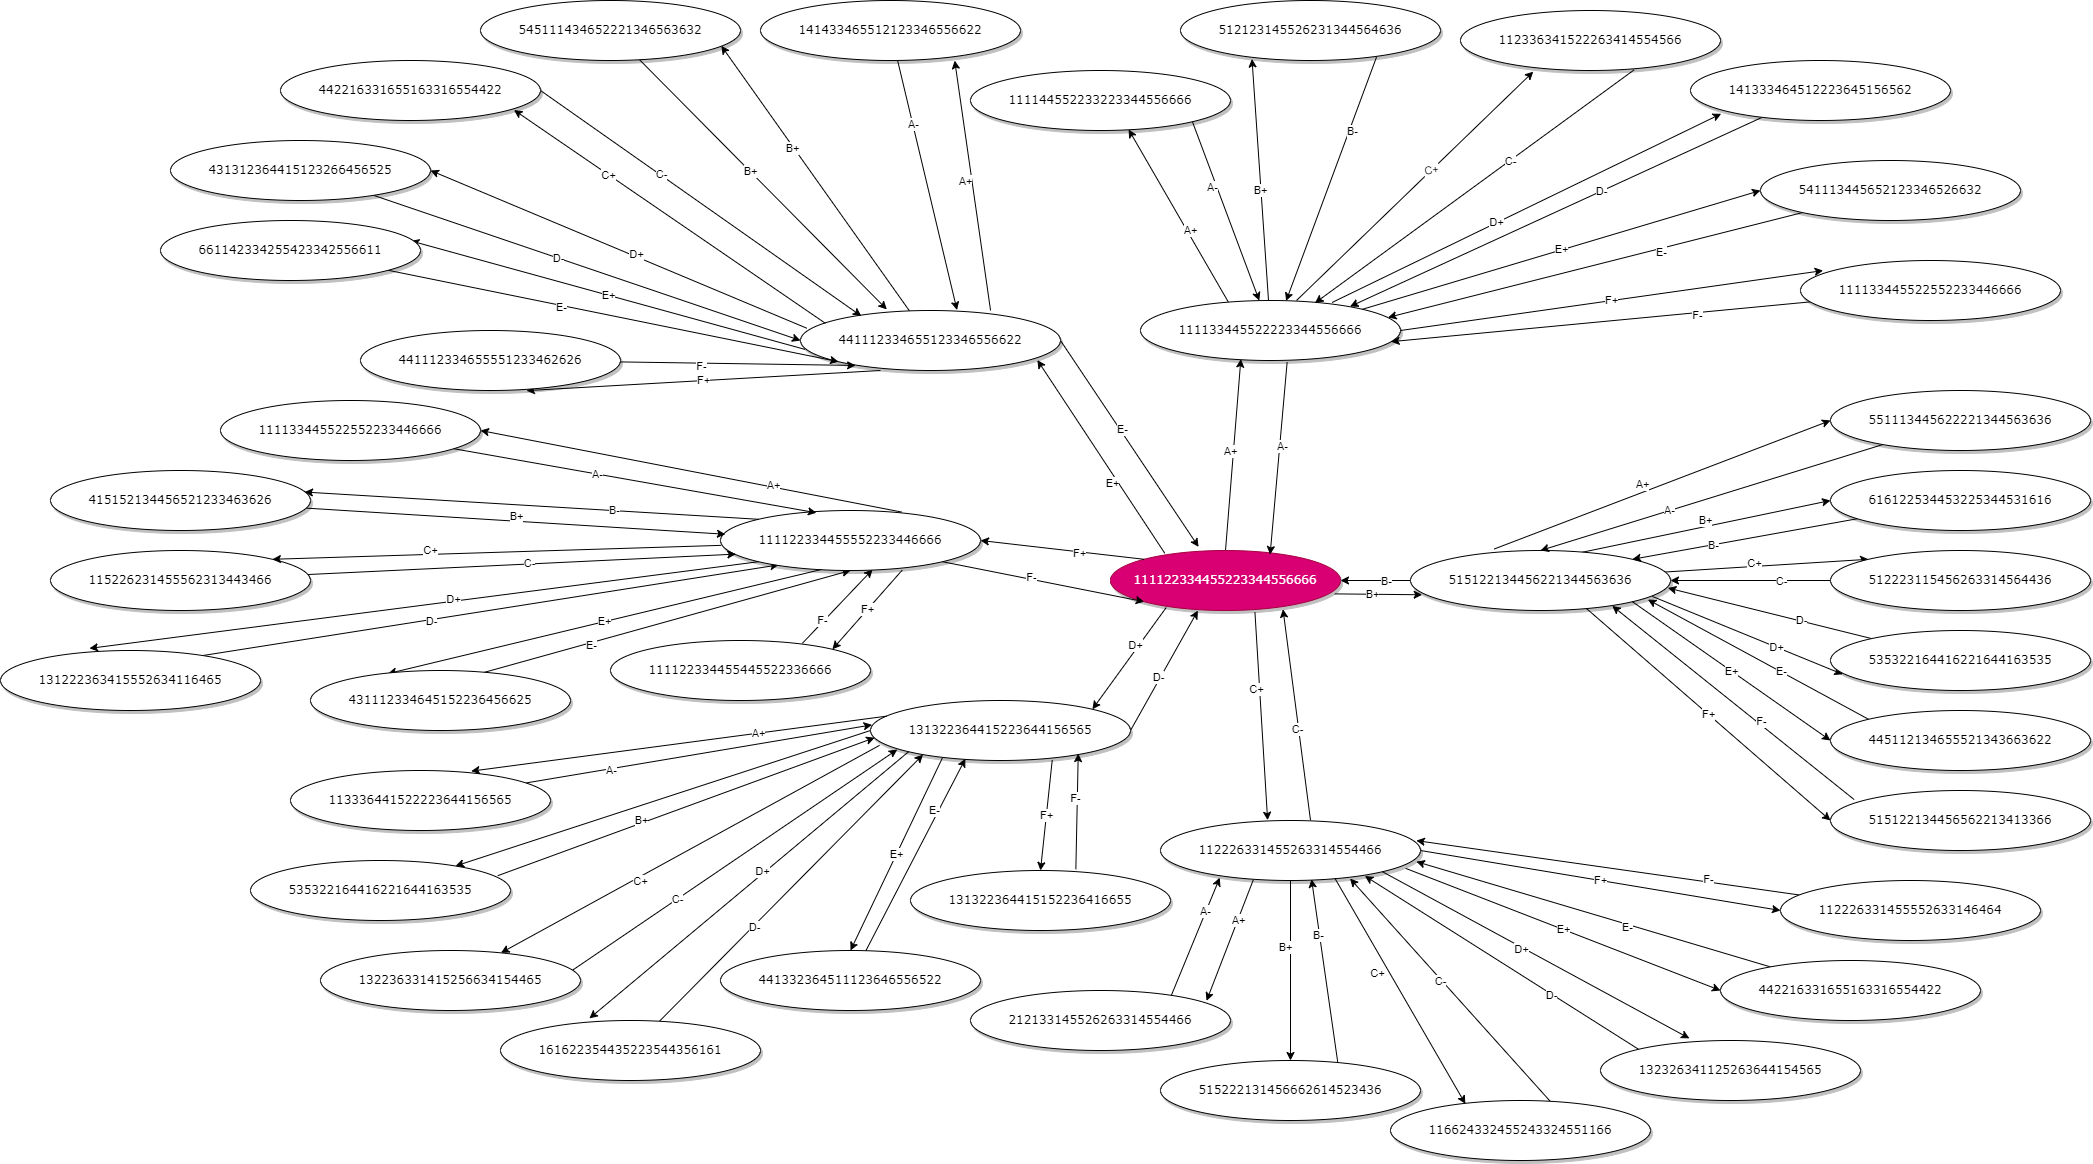

Las subcadenas posteriores a la cadena/cinta inicial definirán los movimientos del cubo.

Empezando siempre con 'G' seguido de una letra que represente el vertice que se va a rotar.
$$
A → 1 → Azul/celeste $$ $$
B → 2 → Gris$$ $$
C → 3 → Rojo$$ $$
D → 4 → Amarillo$$ $$
E → 5 → Purpura/morado$$ $$
F → 6 → Verde$$

Lo siguiente es un numero $p : \forall p \in \{A,a\}$ donde 'A' representa un giro con sentido de un reloj y 'a' en contra del sentido de un reloj.


De modo que una subcadena valida podria ser $AAa$ que representa dos giros de la cara $1→ A → Roja$ en sentido de las manesillas del reloj.

El automata propuesto recibiria una cadena que indica las transiciones que este debe hacer y el estado final indica una representacion del estado final del cubo.



# ¿Como funciona?
Al recibir la orden de girar el vertice que se tomara como punto de referencia, la maquina ejecutara una serie de pasos para reordenar la cinta y a su vez limpiar la orden ejecutada de la propia cinta.
$$
A^+ ≫ i_1 → i_2→ i_4→ i_3→ i_1 :: [i_5,i_{12}]→i_{i+2} :: i_{11}→i_5 :: i_{12} →i_6 $$ $$
B^+ ≫ i_5→i_6→i_{14}→i_{13}→i_5 :: i_1→i_7→i_{21}→i_{20}→i_1 :: i_3→i_{15}→i_{23}→i_{12}→i_3 $$ $$
C^+ ≫ i_7→i_8→i_{16}→i_{15}→i_7 :: i_3→i_9→i_{22}→i_{14}→i_3 :: i_4→i_{17}→i_{21}→i_6→i_4 $$ $$
D^+ ≫ i_9→i_{10}→i_{18}→i_{17}→i_9 :: i_2→i_{19}→i_{22}→i_8→i_2 :: i_4→i_{11}→i_{24}→i_{16}→i_4 $$ $$
E^+ ≫ i_{11}→i_{12}→i_{20}→i_{19}→i_{11} :: i_1→i_{10}→i_{24}→i_{13}→i_1 :: i_2→i_{18}→i_{23}→i_5→i_2 $$ $$
F^+ ≫ i_{21}→i_{22}→i_{24}→i_{23}→i_{21} :: [i_{13},i_{20}] → i_{i+2} :: i_{19} → i_{13} :: i_{20} → i_{14} $$

Notese que ir una vez hacia la izquierda en un cubo es equivalente a moverse 3 pasos a la derecha por lo que los movimientos con orientacion 1 son representados en la maquina como 3 veces un giro a la derecha y son reemplazados en las subcadenas antes de empezar a operar

In [3]:
#definicion formal
from logging import exception
from typing_extensions import Self
def dfa1():
    from automata.fa.dfa import DFA
    d = DFA(
        states =  {'q111122334455223344556666',
                   'q111133445522223344556666',
                   'q111144552233223344556666',
                   'q512123145526231344564636',
                   'q112336341522263414554566',
                   'q141333464512223645156562',
                   'q541113445652123346526632',
                   'q111133445522552233446666',
                   'q515122134456221344563636',
                   'q551113445622221344563636',
                   'q616122534453225344531616',
                   'q512223115456263314564436',
                   'q535322164416221644163535',
                   'q445112134655521343663622',
                   'q515122134456562213413366',
                   'q112226331455263314554466',
                   'q212133145526263314554466',
                   'q515222131456662614523436',
                   'q116624332455243324551166',
                   'q132326341125263644154565',
                   'q442216331655163316554422',
                   'q112226331455552633146464',
                   'q131322364415223644156565',
                   'q113336441522223644156565',
                   'q132236331415256634154465',
                   'q161622354435223544356161',
                   'q441332364511123646556522',
                   'q131322364415152236416655',
                   'q441112334655123346556622',
                   'q141433465512123346556622',
                   'q545111434652221346563632',
                   'q442216331655163313554422',
                   'q431312364415123266456525',
                   'q661142334255423342556611',
                   'q441112334655551233462626',
                   'q111122334455552233446666',
                   'q111133445522552233446666',
                   'q415152134456521233463626',
                   'q115226231455562313443466',
                   'q131222363415552634116465',
                   'q431112334645152236456625',
                   'q111122334455445522336666'
                   },
        input_symbols = {'a','A','b','B','c','C','d','D','e','E','f','F'},
        transitions = {
            'q111122334455223344556666':{'a':'q111133445522223344556666',
                                         'b':'q515122134456221344563636',
                                         'c':'q112226331455263314554466',
                                         'd':'q131322364415223644156565',
                                         'e':'q441112334655123346556622',
                                         'f':'q111122334455552233446666'
                                         }, 

            'q111133445522223344556666':{'a':'q111144552233223344556666',
                                         'b':'q512123145526231344564636',
                                         'c':'q112336341522263414554566',
                                         'd':'q141333464512223645156562',
                                         'e':'q541113445652123346526632',
                                         'f':'q111133445522552233446666',
                                         'A':'q111122334455223344556666'
                                         },
                       
            'q111144552233223344556666':{'A':'q111133445522223344556666'},
            'q512123145526231344564636':{'B':'q111133445522223344556666'},
            'q112336341522263414554566':{'C':'q111133445522223344556666'},
            'q141333464512223645156562':{'D':'q111133445522223344556666'},
            'q541113445652123346526632':{'E':'q111133445522223344556666'},
            'q111133445522552233446666':{'F':'q111133445522223344556666'},

            'q515122134456221344563636':{'a':'q551113445622221344563636',
                                         'b':'q616122534453225344531616',
                                         'c':'q512223115456263314564436',
                                         'd':'q535322164416221644163535',
                                         'e':'q445112134655521343663622',
                                         'f':'q515122134456562213413366',
                                         'B':'q111122334455223344556666'
                                         },
                       
            'q551113445622221344563636':{'A':'q515122134456221344563636'},
            'q616122534453225344531616':{'B':'q515122134456221344563636'},
            'q512223115456263314564436':{'C':'q515122134456221344563636'},
            'q535322164416221644163535':{'D':'q515122134456221344563636'},
            'q445112134655521343663622':{'E':'q515122134456221344563636'},
            'q515122134456562213413366':{'F':'q515122134456221344563636'},

            'q112226331455263314554466':{'a':'q212133145526263314554466',
                                         'b':'q515222131456662614523436',
                                         'c':'q116624332455243324551166',
                                         'd':'q132326341125263644154565',
                                         'e':'q442216331655163316554422',
                                         'f':'q112226331455552633146464',
                                         'C':'q111122334455223344556666'
                                         },
            'q212133145526263314554466':{'A':'q112226331455263314554466'},
            'q515222131456662614523436':{'B':'q112226331455263314554466'},
            'q116624332455243324551166':{'C':'q112226331455263314554466'},
            'q132326341125263644154565':{'D':'q112226331455263314554466'},
            'q442216331655163316554422':{'E':'q112226331455263314554466'},
            'q112226331455552633146464':{'F':'q112226331455263314554466'},

            'q131322364415223644156565':{'a':'q113336441522223644156565',
                                         'b':'q535322164416221644163535',
                                         'c':'q132236331415256634154465',
                                         'd':'q161622354435223544356161',
                                         'e':'q441332364511123646556522',
                                         'f':'q131322364415152236416655',
                                         'D':'q111122334455223344556666'
                                         },
            'q113336441522223644156565':{'A':'q131322364415223644156565'},
            'q535322164416221644163535':{'B':'q131322364415223644156565'},
            'q132236331415256634154465':{'C':'q131322364415223644156565'},
            'q161622354435223544356161':{'D':'q131322364415223644156565'},
            'q441332364511123646556522':{'E':'q131322364415223644156565'},
            'q131322364415152236416655':{'F':'q131322364415223644156565'},
            
            'q441112334655123346556622':{'a':'q141433465512123346556622',
                                         'b':'q545111434652221346563632',
                                         'c':'q442216331655163316554422',
                                         'd':'q431312364415123266456525',
                                         'e':'q661142334255423342556611',
                                         'f':'q441112334655551233462626',
                                         'E':'q111122334455223344556666'
                                         },
                       
            'q141433465512123346556622':{'A':'q441112334655123346556622'},
            'q545111434652221346563632':{'B':'q441112334655123346556622'},
            'q442216331655163316554422':{'C':'q441112334655123346556622'},
            'q431312364415123266456525':{'D':'q441112334655123346556622'},
            'q661142334255423342556611':{'E':'q441112334655123346556622'},
            'q441112334655551233462626':{'F':'q441112334655123346556622'},

            'q111122334455552233446666':{'a':'q111133445522552233446666',
                                         'b':'q415152134456521233463626',
                                         'c':'q115226231455562313443466',
                                         'd':'q131222363415552634116465',
                                         'e':'q431112334645152236456625',
                                         'f':'q111122334455445522336666',
                                         'F':'q111122334455223344556666'
                                         },
            'q111133445522552233446666':{'A':'q111122334455552233446666'},
            'q415152134456521233463626':{'B':'q111122334455552233446666'},
            'q115226231455562313443466':{'C':'q111122334455552233446666'},
            'q131222363415552634116465':{'D':'q111122334455552233446666'},
            'q431112334645152236456625':{'E':'q111122334455552233446666'},
            'q111122334455445522336666':{'F':'q111122334455552233446666'},

        },
        initial_state = 'q111122334455223344556666',
        final_states = {'q111122334455223344556666',
                   'q111133445522223344556666',
                   'q111144552233223344556666',
                   'q512123145526231344564636',
                   'q112336341522263414554566',
                   'q141333464512223645156562',
                   'q541113445652123346526632',
                   'q111133445522552233446666',
                   'q515122134456221344563636',
                   'q551113445622221344563636',
                   'q616122534453225344531616',
                   'q512223115456263314564436',
                   'q535322164416221644163535',
                   'q445112134655521343663622',
                   'q515122134456562213413366',
                   'q112226331455263314554466',
                   'q212133145526263314554466',
                   'q515222131456662614523436',
                   'q116624332455243324551166',
                   'q132326341125263644154565',
                   'q442216331655163316554422',
                   'q112226331455552633146464',
                   'q131322364415223644156565',
                   'q113336441522223644156565',
                   'q132236331415256634154465',
                   'q161622354435223544356161',
                   'q441332364511123646556522',
                   'q131322364415152236416655',
                   'q441112334655123346556622',
                   'q141433465512123346556622',
                   'q545111434652221346563632',
                   'q442216331655163313554422',
                   'q431312364415123266456525',
                   'q661142334255423342556611',
                   'q441112334655551233462626',
                   'q111122334455552233446666',
                   'q111133445522552233446666',
                   'q415152134456521233463626',
                   'q115226231455562313443466',
                   'q131222363415552634116465',
                   'q431112334645152236456625',
                   'q111122334455445522336666'},
        allow_partial = True
    )
    return d


In [5]:
## 

ordenes = 'aeEA'

##

AFN = dfa1()
pasos = AFN.read_input_stepwise(ordenes)
i = 0,
try:
  print(next(pasos)+"\n")
  print("--->"+ordenes[0])
  print(next(pasos)+"\n")
  print("--->"+ordenes[1])
  print(next(pasos)+"\n")
  print("--->"+ordenes[2])
  print(next(pasos)+"\n")
  print("--->"+ordenes[3])
  print(next(pasos)+"\n")

except Exception as e:
  print("...")

q111122334455223344556666

--->a
q111133445522223344556666

--->e
q541113445652123346526632

--->E
q111133445522223344556666

--->A
q111122334455223344556666

